<a href="https://colab.research.google.com/github/thatadi/Wine-Recommender/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [ ]:
df=pd.read_csv("winemag-data-130k-v2.csv")

In [ ]:
print(df.shape)

(129971, 14)


In [ ]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [ ]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('region_2',axis=1)
df=df.dropna(how='any')
df=df[df['points']>=90]

In [ ]:
df.shape

(23734, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23734 entries, 123 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                23734 non-null  object 
 1   description            23734 non-null  object 
 2   designation            23734 non-null  object 
 3   points                 23734 non-null  int64  
 4   price                  23734 non-null  float64
 5   province               23734 non-null  object 
 6   region_1               23734 non-null  object 
 7   taster_name            23734 non-null  object 
 8   taster_twitter_handle  23734 non-null  object 
 9   title                  23734 non-null  object 
 10  variety                23734 non-null  object 
 11  winery                 23734 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.4+ MB


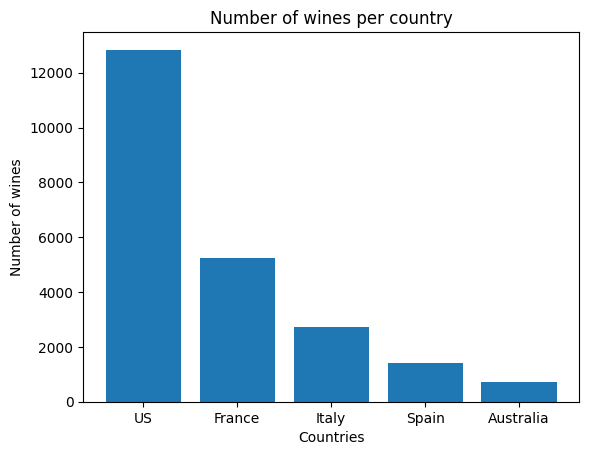

In [ ]:
value_counts=df['country'].value_counts()
value_counts=value_counts.head(5)
plt.bar(value_counts.index,value_counts.values)
plt.xlabel("Countries")
plt.ylabel("Number of wines")
plt.title("Number of wines per country")
plt.show()

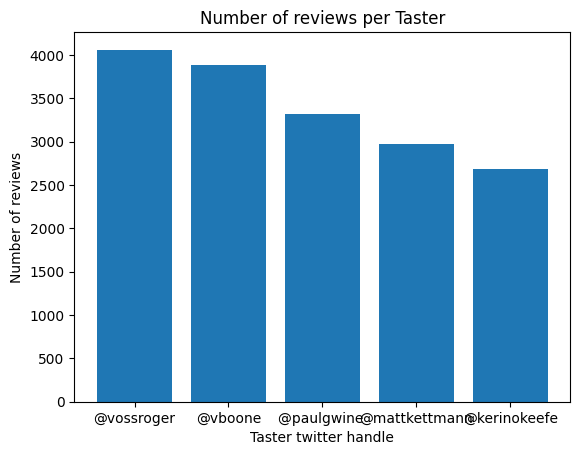

In [ ]:
taster=df['taster_twitter_handle'].value_counts()
taster=taster.head(5)
plt.bar(taster.index,taster.values)
plt.xlabel("Taster twitter handle")
plt.ylabel("Number of reviews")
plt.title("Number of reviews per Taster")
plt.show()

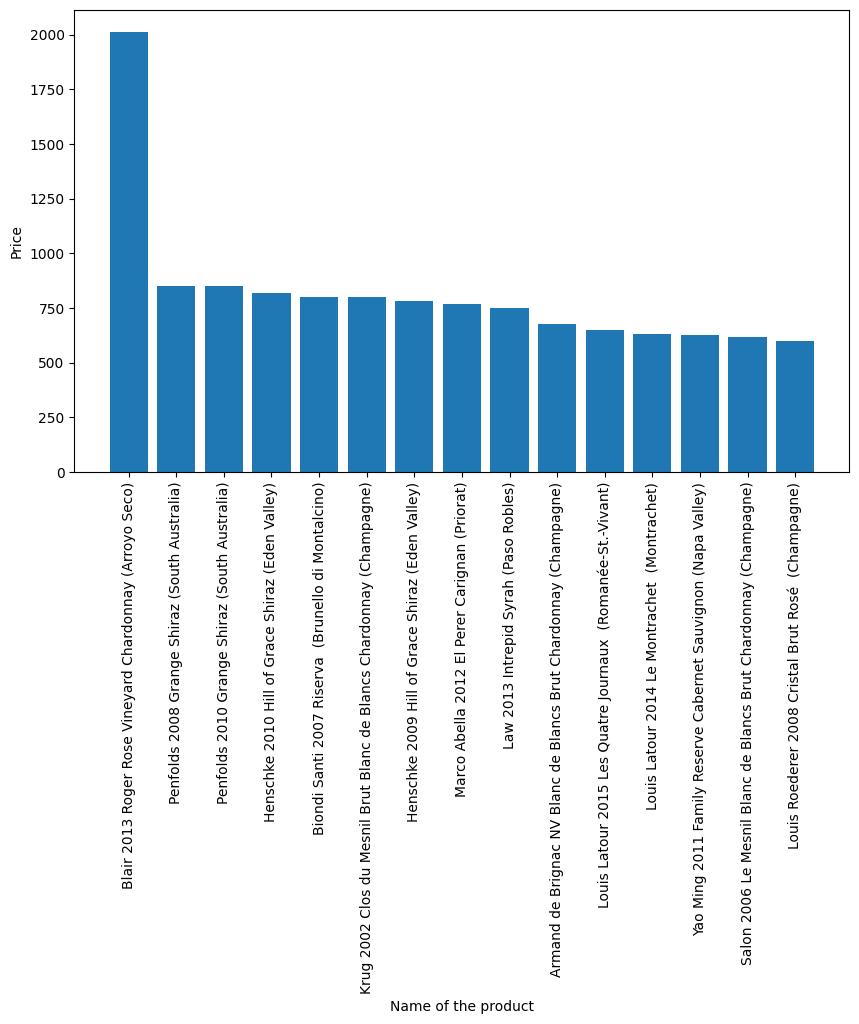

In [ ]:
prices=df.sort_values(by='price',ascending=False).head(15)
plt.figure(figsize=(10, 6))
plt.bar(prices['title'],prices['price'])
plt.xticks(rotation=90)
plt.xlabel("Name of the product")
plt.ylabel("Price")
plt.show()

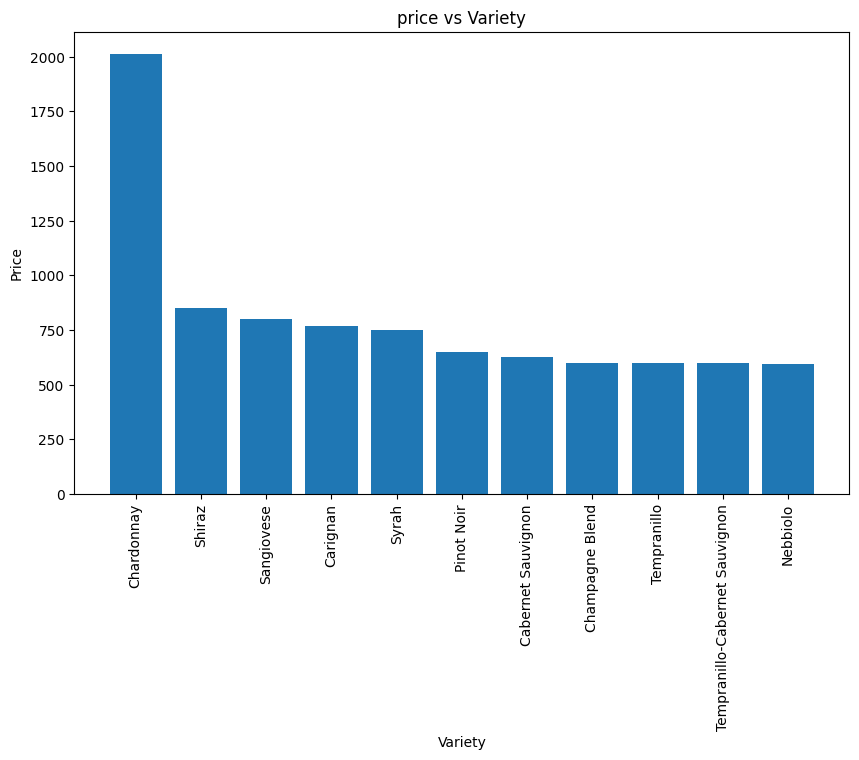

In [ ]:
prices=df.sort_values(by='price',ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.bar(prices['variety'],prices['price'])
plt.xticks(rotation=90)
plt.xlabel("Variety")
plt.ylabel("Price")
plt.title("price vs Variety")
plt.show()

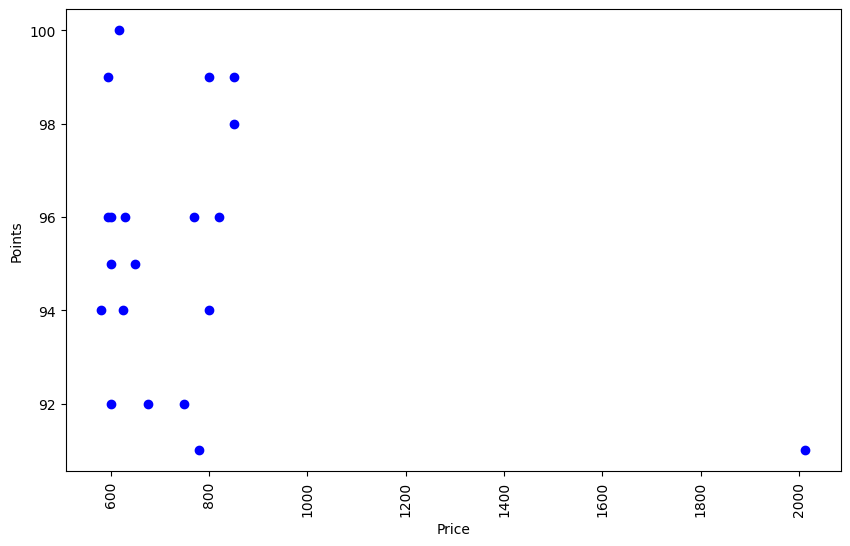

In [ ]:
prices=df.sort_values(by='price',ascending=False).head(20)
plt.figure(figsize=(10, 6))
plt.scatter(prices['price'],prices['points'],color='blue')
plt.xticks(rotation=90)
plt.xlabel("Price")
plt.ylabel("Points")
plt.show()

In [ ]:
df['points'].value_counts()

90     6713
91     5668
92     4816
93     3450
94     1985
95      738
96      231
97       80
98       34
99       12
100       7
Name: points, dtype: int64

In [ ]:
expensive_df=df.sort_values(by='price',ascending=False).head(10)
expensive_df

,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair
77028,Australia,This has all the size and weight you've come t...,Grange,98,850.0,South Australia,South Australia,Joe Czerwinski,@JoeCz,Penfolds 2008 Grange Shiraz (South Australia),Shiraz,Penfolds
56953,Australia,"This inky, embryonic wine deserves to be cella...",Grange,99,850.0,South Australia,South Australia,Joe Czerwinski,@JoeCz,Penfolds 2010 Grange Shiraz (South Australia),Shiraz,Penfolds
56959,Australia,Is this the Yin to Grange's Yang? The wines ar...,Hill of Grace,96,820.0,South Australia,Eden Valley,Joe Czerwinski,@JoeCz,Henschke 2010 Hill of Grace Shiraz (Eden Valley),Shiraz,Henschke
108484,Italy,Thanks to having some of the highest vineyards...,Riserva,94,800.0,Tuscany,Brunello di Montalcino,Kerin O’Keefe,@kerinokeefe,Biondi Santi 2007 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
36529,France,Pure Chardonnay from the walled vineyard in th...,Clos du Mesnil Brut Blanc de Blancs,99,800.0,Champagne,Champagne,Roger Voss,@vossroger,Krug 2002 Clos du Mesnil Brut Blanc de Blancs ...,Chardonnay,Krug
39627,Australia,"This wine is rather developed, showing leather...",Hill of Grace,91,780.0,South Australia,Eden Valley,Joe Czerwinski,@JoeCz,Henschke 2009 Hill of Grace Shiraz (Eden Valley),Shiraz,Henschke
15846,Spain,This single-vineyard Carignan is living proof ...,El Perer,96,770.0,Catalonia,Priorat,Michael Schachner,@wineschach,Marco Abella 2012 El Perer Carignan (Priorat),Carignan,Marco Abella
51978,US,"This is a powerful bottling, as is expected by...",Intrepid,92,750.0,California,Paso Robles,Matt Kettmann,@mattkettmann,Law 2013 Intrepid Syrah (Paso Robles),Syrah,Law
96148,France,In its silver-coated bottle with the “Ace of S...,Blanc de Blancs Brut,92,675.0,Champagne,Champagne,Roger Voss,@vossroger,Armand de Brignac NV Blanc de Blancs Brut Char...,Chardonnay,Armand de Brignac


In [ ]:
import pickle
pickle.dump(expensive_df,open('expensive.pkl','wb'))

In [ ]:
col = ['province','variety','points']
wine1 = df[col]
wine1 = wine1.drop_duplicates(['province','variety'])
wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)

In [ ]:
pickle.dump(wine_pivot,open('wine_pivot.pkl','wb'))

In [ ]:
index=pd.DataFrame(wine_pivot.index)
index

,variety
0,Aglianico
1,Albana
2,Albariño
3,Alicante Bouschet
4,Alsace white blend
...,...
276,White Blend
277,White Riesling
278,Zibibbo
279,Zinfandel


In [ ]:
knn = NearestNeighbors(n_neighbors=10,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

In [ ]:
pickle.dump(model_knn,open('model_knn.pkl','wb'))

In [ ]:
query_index = 4
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):

            print(wine_pivot.index[indice.flatten()[i]])

Alsace white blend
Chasselas
Pinot Auxerrois
Sylvaner
Edelzwicker
Auxerrois


In [ ]:

query_index = 1
list=[]
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):

           list.append(wine_pivot.index[indice.flatten()[i]])
print(list)




['Verdicchio', 'Verdeca', 'Lambrusco di Sorbara', 'Lambrusco', 'Sagrantino', 'Lambrusco Grasparossa']


In [ ]:
search_value='Zweigelt'
index_number=0
for i in range (wine_pivot.shape[0]):
  if search_value==wine_pivot.index[i]:
    index_number=i

print(index_number)

280


In [ ]:
wine_pivot.columns

Index(['Alsace', 'Andalucia', 'Australia Other', 'Beaujolais', 'Bordeaux',
       'British Columbia', 'Burgundy', 'California', 'Catalonia',
       'Central Italy', 'Central Spain', 'Champagne', 'Colorado',
       'France Other', 'Galicia', 'Idaho', 'Italy Other',
       'Languedoc-Roussillon', 'Levante', 'Loire Valley', 'Lombardy',
       'Mendoza Province', 'New South Wales', 'New York', 'Northeastern Italy',
       'Northern Spain', 'Northwestern Italy', 'Ontario', 'Oregon', 'Other',
       'Pennsylvania', 'Piedmont', 'Provence', 'Rhône Valley',
       'Sicily & Sardinia', 'South Australia', 'Southern Italy',
       'Southwest France', 'Spain Other', 'Spanish Islands', 'Tasmania',
       'Tuscany', 'Veneto', 'Victoria', 'Washington', 'Western Australia'],
      dtype='object', name='province')

In [ ]:
points=df.sort_values(by='points',ascending=False).head(10)
if isinstance(points, pd.DataFrame):
    print("points is a DataFrame")
else:
    print("points is not a DataFrame")

points is a DataFrame


In [ ]:
pickle.dump(points,open('points.pkl','wb'))